In [1]:
#http://docs.python-guide.org/en/latest/scenarios/xml/
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepath = 'data2.xml'

with open(filepath) as fd:
    xml = xmltodict.parse(fd.read())

In [3]:
xml['Data']['Gaze'][0]

OrderedDict([(u'Left',
              OrderedDict([(u'Ray',
                            OrderedDict([(u'@valid', u'True'),
                                         (u'@timestamp', u'2436408044283'),
                                         (u'@origin',
                                          u'(0000.72750710, 0000.88932070, -0001.52425400)'),
                                         (u'@direction',
                                          u'(0000.10425780, 0000.06111056, -0000.99267110)')]))]))])

In [4]:
gazes = xml['Data']['Gaze']
data = {}

for gaze in gazes:
    for k, v in gaze.items():
        for k_ray, v_ray in v.items():
            data.setdefault(k.lower()+'_oz', []).append(str(v_ray['@origin'][1:-2].split(",")[2]))
            data.setdefault(k.lower()+'_oy', []).append(str(v_ray['@origin'][1:-2].split(",")[1]))
            data.setdefault(k.lower()+'_ox', []).append(str(v_ray['@origin'][1:-2].split(",")[0]))
            data.setdefault(k.lower()+'_dz', []).append(v_ray['@direction'][1:-2].split(",")[2])
            data.setdefault(k.lower()+'_dy', []).append(v_ray['@direction'][1:-2].split(",")[1])
            data.setdefault(k.lower()+'_dx', []).append(v_ray['@direction'][1:-2].split(",")[0])

df = pd.DataFrame(data)

In [5]:
df.head()

,left_dx,left_dy,left_ox,left_oy,right_dx,right_dy,right_ox,right_oy
0,0000.10425780,0000.06111056,0000.72750710,0000.88932070,0000.04352655,0000.03371385,0000.66689680,0000.88721380
1,0000.10101180,0000.05310239,0000.72752490,0000.88960340,0000.04536549,0000.03908587,0000.66697820,0000.88707540
2,0000.09710792,0000.05070928,0000.72760000,0000.88972520,0000.04481789,0000.03202281,0000.66696960,0000.88741140
3,0000.09841883,0000.05934919,0000.72760740,0000.88964410,0000.03750480,0000.04257681,0000.66701880,0000.88735240
4,0000.09905662,0000.05779595,0000.72759530,0000.88971390,0000.04431447,0000.03800806,0000.66696270,0000.88749750


In [6]:
len(df)

1515

In [7]:
df=df[df.left_ox!='NaN']

In [8]:
cols = [i for i in df.columns]

In [9]:
'''Check that there are no NaN'''
df.tail(5)

,left_dx,left_dy,left_ox,left_oy,right_dx,right_dy,right_ox,right_oy
1401,-0000.00256500,-0000.01827721,0000.76003190,0000.86802160,-0000.00678655,-0000.01478651,0000.69920490,0000.86965390
1402,-0000.01459850,-0000.10442140,0000.76038030,0000.87376700,-0000.06481650,-0000.13901320,0000.69872550,0000.86907370
1403,-0000.05093048,-0000.15148460,0000.75908340,0000.86719780,-0000.09460239,-0000.38178130,0000.69798870,0000.86745980
1404,-0000.09055937,-0000.41718570,0000.75850140,0000.86652120,-0000.05478483,-0000.50264570,0000.69757370,0000.86818640
1405,-0000.04085603,-0000.58045140,0000.75797570,0000.86675240,-0000.06875179,-0000.55176390,0000.69769440,0000.87634830


In [10]:
df[cols] = df[cols].replace(' ','').astype(float)

In [11]:
import seaborn as sns
sns.set(style="white", color_codes=True)

import numpy as np
import matplotlib.pyplot as plt

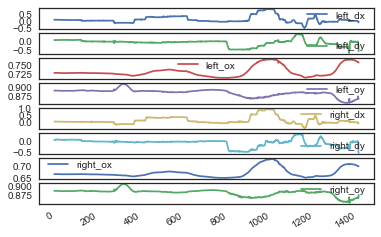

In [12]:
'''Just out of curiosity'''
df.plot(subplots=True);

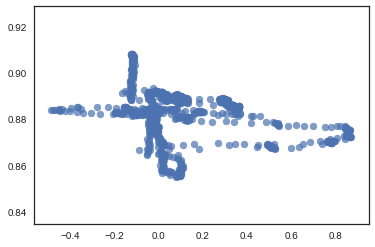

In [13]:
'''Left direction'''
plt.scatter(df['left_dx'], df['left_oy'], alpha=.7)

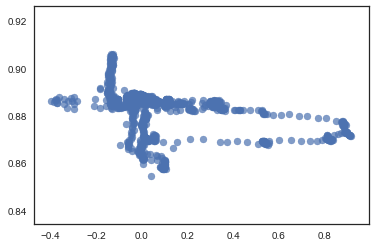

In [14]:
'''Right direction'''
plt.scatter(df['right_dx'], df['right_oy'], alpha=.7);

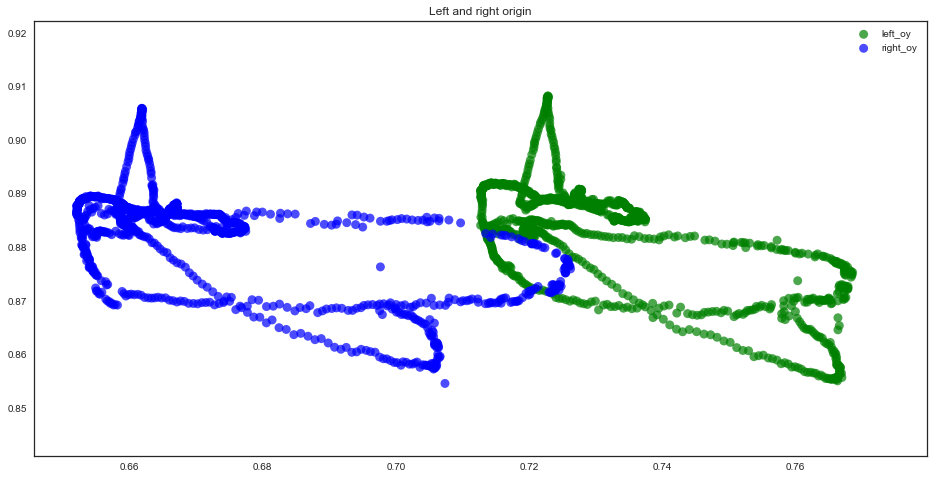

In [15]:

data = ('left', 'right')
colors = ("green", "blue")
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for data, color in zip(data, colors):
    x = df[data+'_ox']
    y = df[data+'_oy']
    ax.scatter(x, y, alpha=0.7, c=color, edgecolors='none', s=80)
 
plt.title('Left and right origin')
plt.legend(loc=1)
plt.savefig('gaze_data2_origin.png', format='png', dpi=300);

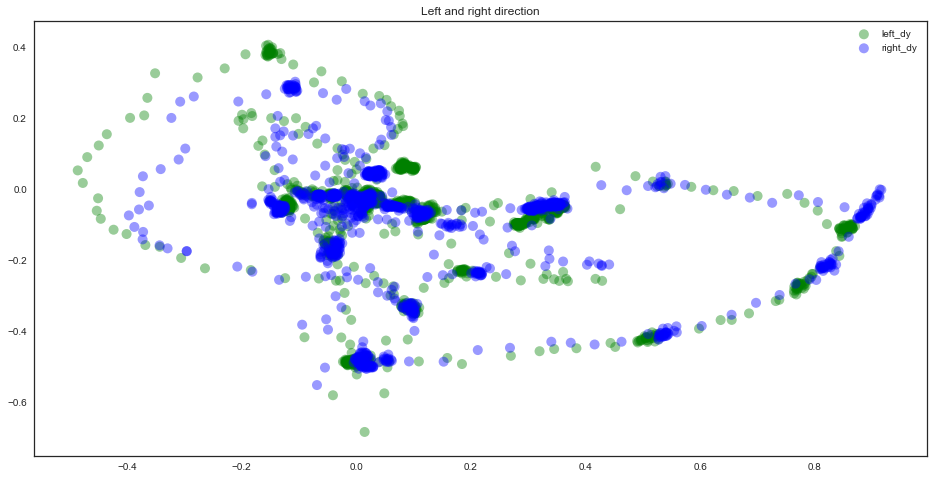

In [16]:
data = ('left', 'right')
colors = ("green", "blue")
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for data, color in zip(data, colors):
    x = df[data+'_dx']
    y = df[data+'_dy']
    ax.scatter(x, y, alpha=0.4, c=color, edgecolors='none', s=100)
 
plt.title('Left and right direction')
plt.legend(loc=1)
plt.savefig('gaze_data2_direction.png', format='png', dpi=300);